In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
f = lambda x: ((1 - 0.25*x**2)/0.0625)**0.5

(-8, 8)

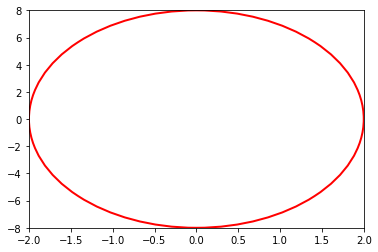

In [79]:
from matplotlib.patches import Ellipse
ax = plt.subplot()

ellipse = Ellipse(xy=(0, 0), width=1/0.25, height=1/0.0625,edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.xlim([-2,2])
plt.ylim([-8,8])

In [109]:
x1 = np.linspace(-2,2,1000)
y1 = f(x1) + np.random.normal(0,0.1,size = 1000)
y2 = -f(x1)+ np.random.normal(0,0.1,size = 1000)
x = np.array([x1,x1]).reshape(2000)
y = np.array([y1,y2]).reshape(2000)

In [110]:
from scipy.optimize import linprog

In [111]:
A_ub = np.zeros([4000,2002])
A_ub[:2000,0] = x**2
A_ub[:2000,1] = y**2
A_ub[2000:,0] = -x**2
A_ub[2000:,1] = -y**2

A_ub[:2000,2:] = -np.identity(2000)
A_ub[2000:,2:] = -np.identity(2000)
print(A_ub)

[[ 4.00000000e+00  8.56550469e-04 -1.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 3.98400002e+00  7.55553929e-02 -0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 3.96803210e+00  1.68520855e-01 -0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [-3.96803210e+00 -3.62325533e-01 -0.00000000e+00 ... -1.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.98400002e+00 -8.19279678e-02 -0.00000000e+00 ... -0.00000000e+00
  -1.00000000e+00 -0.00000000e+00]
 [-4.00000000e+00 -1.65525062e-03 -0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -1.00000000e+00]]


In [116]:
b = np.ones(4000)
b[2000:] = -1

In [118]:
c = np.ones(2002)
c[0] = 0
c[1] = 0
res = linprog(c, A_ub=A_ub, b_ub = b, options={"disp": True},method='interior-point')

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 2000.0              
0.2398990602156     0.2398990601837     0.2398990601837     0.7950471026426  0.2398990601837     204.7825876332      
0.04647341467036    0.04647341465904    0.04647341465906    0.8236033858661  0.0464734146591     75.42991215487      
0.009104953236001   0.009104953245911   0.00910495324589    0.8180006217879  0.00910495324589    64.2796674091       
0.001882710264913   0.001882710248344   0.001882710248354   0.808543785631   0.001882710248232   62.72704707881      
0.0004316276398952  0.0004316276284867  0.0004316276284791  0.7858880803948  0.0004316276287105  62.42206811189      
9.743332318505e-05  9.743327919451e-05  9.743327921442e-05  0.7925606176591  9.743327813332e-05  62.35009760104      
4.156894459877e-05  4.156891352844e-05  4.156891351859e-0

In [119]:
print(res)

     con: array([], dtype=float64)
     fun: 62.32871595429242
 message: 'Optimization terminated successfully.'
     nit: 11
   slack: array([-3.99238642e-09, -3.99199496e-09, -3.99850353e-09, ...,
        3.39388526e-02,  7.13708005e-03,  5.19280008e-03])
  status: 0
 success: True
       x: array([0.25062342, 0.06206481, 0.00254683, ..., 0.01696942, 0.00356854,
       0.0025964 ])


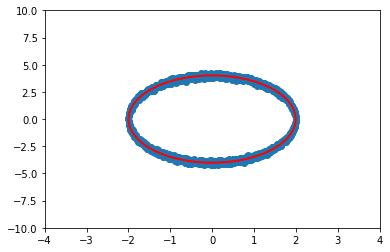

In [120]:
ax = plt.subplot()

ellipse = Ellipse(xy=(0, 0), width=2*(1/res.x[0])**0.5, height=2*(1/res.x[1])**0.5,edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.xlim(-4,4)
plt.ylim(-10,10)

plt.scatter(x,y)